# 잔차 분석

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data[:, 2:3]   # diabetes.data[:, 2].reshape(-1,1)
y = diabetes.target
X.shape

(442, 1)

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [4]:
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱: {rss:.2f}')

기울기: 949.4353, 절편: 152.1335, 잔차제곱: 1719581.81


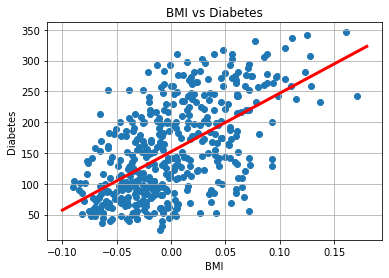

In [5]:
plt.scatter(X, y)
plt.plot([-0.1,0.18], [weight[0]*(-0.1)+bias, weight[0]*0.18+bias], 'r', lw=3)
plt.title('BMI vs Diabetes')
plt.xlabel("BMI")
plt.ylabel("Diabetes")
plt.grid()
plt.show()

### seaborn 으로 선형회귀선 그리기

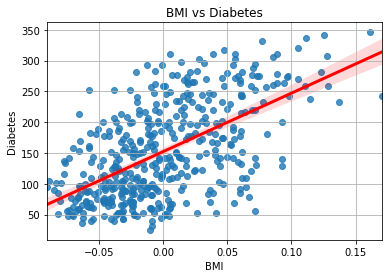

In [7]:
sns.regplot(x=X, y=y, #scatter_kws={'color':'green'}, 
            line_kws={'color':'red', 'linewidth':3}, ci=95)     # 신뢰구간(CI: Confidence Interval)
plt.title('BMI vs Diabetes')
plt.xlabel("BMI")
plt.ylabel("Diabetes")
plt.grid()
plt.show()

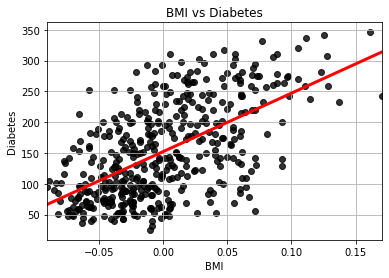

In [8]:
sns.regplot(x=X, y=y, scatter_kws={'color':'black'}, 
            line_kws={'color':'red', 'linewidth':3}, ci=0)     # 신뢰구간(CI: Confidence Interval)
plt.title('BMI vs Diabetes')
plt.xlabel("BMI")
plt.ylabel("Diabetes")
plt.grid()
plt.show()

### 선형성
- 예측값(fitted)과 잔차(residual)의 비교
- 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선)
- 빨간 실선은 잔차의 추세를 나타냄
- lowess: 로컬 가중 산점도 평활기 선(locally-weighted scatterplot smoother)
- 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것

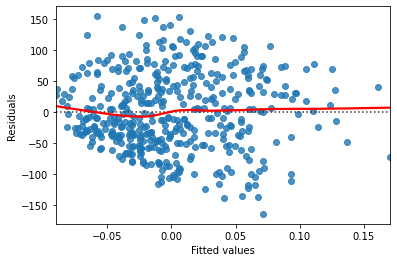

In [17]:
sns.residplot(x=X, y=y, lowess=True, line_kws={'color':'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

### 정규성
- 잔차가 정규분포를 따른다는 가정
- Q-Q 플롯으로 확인할 수 있음
- 잔차가 정규분포를 띄면 Q-Q 플롯에서 점들이 점선을 따라 배치되어 있어야 함

In [11]:
from statsmodels.formula.api import ols
df = pd.DataFrame({'BMI':diabetes.data[:,2], 'Diabetes':diabetes.target})
res = ols('Diabetes ~ BMI', data=df).fit()

In [12]:
fitted = res.predict(df)
residual = df['Diabetes'] - fitted

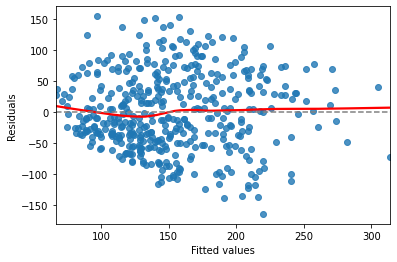

In [15]:
sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

In [18]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

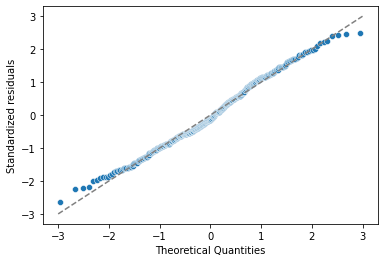

In [21]:
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.xlabel("Theoretical Quantities")
plt.ylabel("Standardized residuals")
plt.show()

### 등분산성
- 회귀모형을 통해 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
- 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌
- 빨간색 실선이 수평선을 그리는 것이 이상적

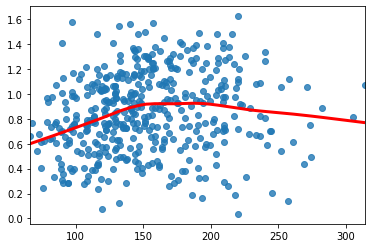

In [22]:
sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red', 'linewidth':3});

### 잔차의 독립성
- 회귀분석에서 잔차는 정규성, 등분산성 그리고 독립성을 가지는 것으로 가정
- 자료 수집 과정에서 무작위 표집(random sampling)을 하였다면, 잔차의 독립성은 만족하는 것으로 봄
- 시계열 자료나 종단연구 자료처럼, 연구 설계 자체가 독립성을 담보할 수 없는 경우에는 더빈-왓슨 검정(Durbin-Watson test) 등을 실시

### 잔차 분석 결과에 따라 다양한 방식의 대응이 가능
- 극단값을 제거
- 독립변수를 추가
- 종속변수를 수학적으로 변환